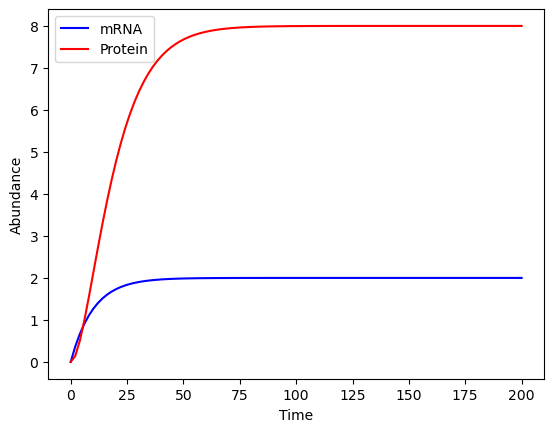

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Initial conditions
y0 = [0, 0]  # Starting with zero mRNAs and zero proteins

# Time points
t = np.linspace(0, 200, 100)  # 100 time points between 0 and 200

# Parameters
k_m = 0.2  # Production rate of mRNA
gamma_m = 0.1  # Degradation rate of mRNA
k_p = 0.4  # Production rate of protein
gamma_p = 0.1  # Degradation rate of protein
params = [k_m, gamma_m, k_p, gamma_p]

# ODE function
def sim(variables, t, params):
    m, p = variables
    k_m, gamma_m, k_p, gamma_p = params
    dm_dt = k_m - gamma_m * m
    dp_dt = k_p * m - gamma_p * p
    return [dm_dt, dp_dt]

# Run simulation
y = odeint(sim, y0, t, args=(params,))

# Plot results
plt.plot(t, y[:, 0], 'b', label='mRNA')
plt.plot(t, y[:, 1], 'r', label='Protein')
plt.xlabel('Time')
plt.ylabel('Abundance')
plt.legend()
plt.show()


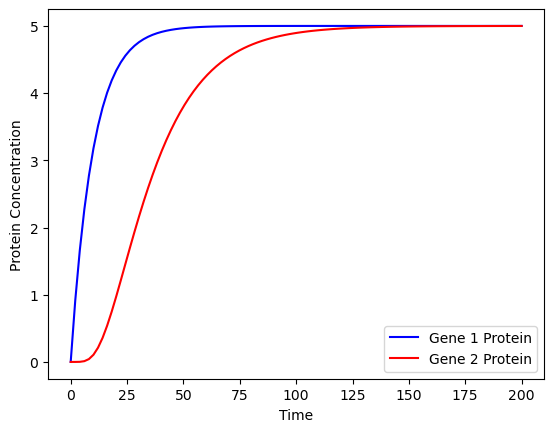

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Initial conditions for Gene 1 and Gene 2
y0 = [0, 0]

# Time points for the simulation
t = np.linspace(0, 200, 100)

# Parameters: production and degradation rates for both genes
# k1 and gamma1 for Gene 1, k2 and gamma2 for Gene 2
# c and n for the Hill function
k1 = 0.5
gamma1 = 0.1
k2 = 0.5
gamma2 = 0.05
c = 5  # Hill function constant
n = 5  # Hill function exponent

params = [k1, gamma1, k2, gamma2, c, n]

# ODE function for the two-gene system
def sim(variables, t, params):
    g1, g2 = variables
    k1, gamma1, k2, gamma2, c, n = params
    dg1_dt = k1 - gamma1 * g1
    dg2_dt = (k2 * (g1**n) / (c**n + g1**n)) - gamma2 * g2
    return [dg1_dt, dg2_dt]

# Running the ODE solver
y = odeint(sim, y0, t, args=(params,))

# Plotting the results
plt.plot(t, y[:, 0], 'b', label='Gene 1 Protein')
plt.plot(t, y[:, 1], 'r', label='Gene 2 Protein')
plt.xlabel('Time')
plt.ylabel('Protein Concentration')
plt.legend()
plt.show()

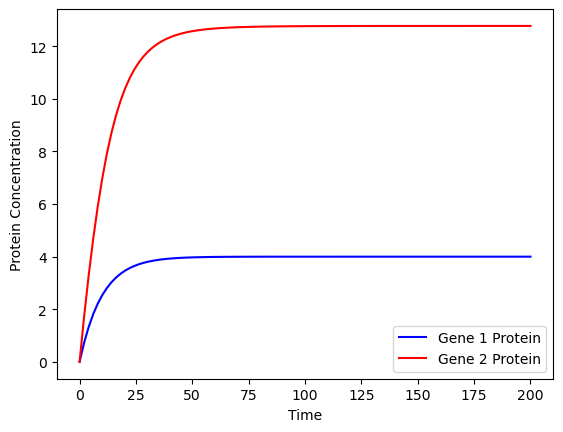

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Initial conditions for Gene 1 and Gene 2
y0 = [0, 0]

# Time points for the simulation
t = np.linspace(0, 200, 100)

# Parameters: production and degradation rates for both genes
# k1 and gamma1 for Gene 1, k2 and gamma2 for Gene 2
# c and n for the Hill function
k1 = 0.4  # Adjusted parameter based on video
gamma1 = 0.1
k2 = 0.9  # Adjusted parameter based on video
gamma2 = 0.05
c = 5  # Hill function constant
n = 4  # Adjusted parameter based on video, Hill function exponent

params = [k1, gamma1, k2, gamma2, c, n]

# ODE function for the two-gene system with repression
def sim(variables, t, params):
    g1, g2 = variables
    k1, gamma1, k2, gamma2, c, n = params
    dg1_dt = k1 - gamma1 * g1
    dg2_dt = (k2 * (c**n) / (c**n + g1**n)) - gamma2 * g2
    return [dg1_dt, dg2_dt]

# Running the ODE solver
y = odeint(sim, y0, t, args=(params,))

# Plotting the results
plt.plot(t, y[:, 0], 'b', label='Gene 1 Protein')
plt.plot(t, y[:, 1], 'r', label='Gene 2 Protein')
plt.xlabel('Time')
plt.ylabel('Protein Concentration')
plt.legend()
plt.show()


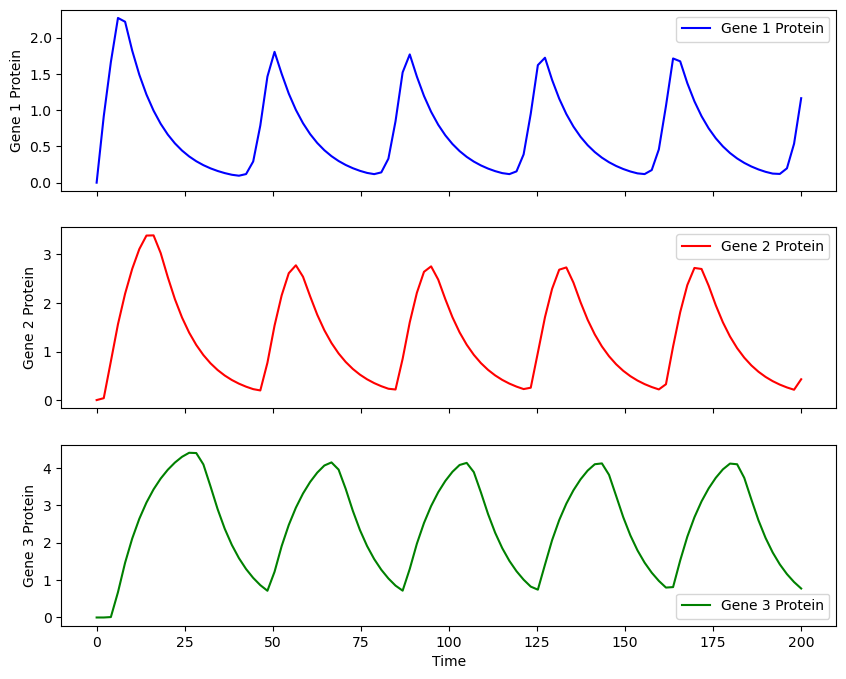

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Initial conditions for the three genes
y0 = [0, 0, 0]

# Time points for the simulation
t = np.linspace(0, 200, 100)

# Parameters: production and degradation rates for the genes
# k1, k2, k3 for production rates and gamma1, gamma2, gamma3 for degradation rates
# c and n for the Hill function parameters
k1 = k2 = k3 = 0.5  # Maximum production rates
gamma1 = gamma2 = gamma3 = 0.1  # Degradation rates
n = 9  # Hill function exponent
c = 1  # Hill function constant

params = [k1, gamma1, k2, gamma2, k3, gamma3, c, n]

# ODE function for the three-gene system
def sim(variables, t, params):
    g1, g2, g3 = variables
    k1, gamma1, k2, gamma2, k3, gamma3, c, n = params
    dg1_dt = k1 * (c**n / (c**n + g3**n)) - gamma1 * g1
    dg2_dt = k2 * (g1**n / (c**n + g1**n)) - gamma2 * g2
    dg3_dt = k3 * (g2**n / (c**n + g2**n)) - gamma3 * g3
    return [dg1_dt, dg2_dt, dg3_dt]

# Running the ODE solver
y = odeint(sim, y0, t, args=(params,))

# Plotting the results in three subplots
fig, (x1, x2, x3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))
x1.plot(t, y[:, 0], 'b', label='Gene 1 Protein')
x2.plot(t, y[:, 1], 'r', label='Gene 2 Protein')
x3.plot(t, y[:, 2], 'g', label='Gene 3 Protein')
x1.legend()
x2.legend()
x3.legend()
x1.set_ylabel('Gene 1 Protein')
x2.set_ylabel('Gene 2 Protein')
x3.set_ylabel('Gene 3 Protein')
plt.xlabel('Time')
plt.show()


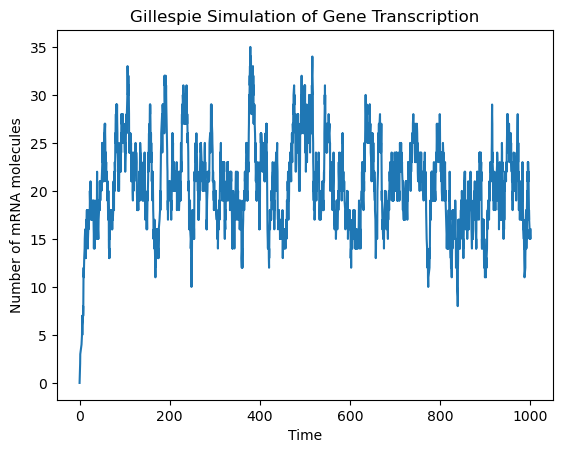

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Gillespie simulation for gene transcription model

# Parameters
k = 2  # Production rate
gamma = 0.1  # Degradation rate
t_end = 1000  # Simulation end time

# Initial conditions
x = [0]  # Initial mRNA level
t = [0]  # Initial time

while t[-1] < t_end:
    current_x = x[-1]

    # Rates of production and degradation
    rates = [k, gamma * current_x]
    rate_sum = sum(rates)

    # Time until next event
    tau = np.random.exponential(scale=1/rate_sum)

    # Choose which event will happen (production or degradation)
    rand = random.uniform(0, rate_sum)
    if 0 <= rand < rates[0]:
        # Production event
        x.append(current_x + 1)
    elif rates[0] <= rand < rate_sum:
        # Degradation event
        x.append(max(current_x - 1, 0))  # Ensure x does not go below 0

    # Update time
    t.append(t[-1] + tau)

# Plotting the results
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Number of mRNA molecules')
plt.title('Gillespie Simulation of Gene Transcription')
plt.show()